In [64]:
from tensorflow.keras import layers, Model, Input, models
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [89]:
(train_image, train_y),(test_image,test_y) = fashion_mnist.load_data()
train_image, val_image, train_y, val_y = train_test_split(train_image, train_y, test_size=0.1)
train_imageSet1 = train_image[:,:14,:]
train_imageSet2 = train_image[:,14:,:]
test_imageSet1 = test_image[:,:14,:]
test_imageSet2 = test_image[:,14:,:]
# 0.1 test_size means 10%
print(train_image.shape, train_y.shape)
# to use categorical_crossentropy, we need one hot encoding which can be done by:
one_hot_y = utils.to_categorical(train_y)

(54000, 28, 28) (54000,)


In [75]:
inputImage1 = Input((14,28), name = 'input1')
inputImage2 = Input((14,28), name = 'input2')
totalInput = layers.Concatenate(axis=-1)([inputImage1,inputImage2])
# Concatenate layer concatenates the two input tensor/layers 
# along the dimension specified by axis (default -1) 
curLayer = layers.Flatten()
curLayer = curLayer(totalInput)
curLayer = layers.Dense(64, activation='relu',name='Dense1')(curLayer)
# a layer object, except for Input and Lambda layers, is a method. 
# the method's input is whatever tensor you want to chug into the layer. 
# (whatever the previous layer outputs)
# it outputs a layer object (connected to whatever its input is).
curLayer = layers.Dense(64, activation='relu',name='Dense2')(curLayer)
print(type(inputImage),type(curLayer))
# we see a tensorflow because the transformation a layer records is stored as a weight tensor.
curLayer = layers.Dense(10, activation='linear', name='Dense3')(curLayer)
output = layers.Softmax(name='output1')(curLayer)
curLayer = layers.ReLU()(curLayer)
output2 = layers.Dense(1, activation='sigmoid',name='output2')(curLayer)

<class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>


Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input1 (InputLayer)             [(None, 14, 28)]     0                                            
__________________________________________________________________________________________________
input2 (InputLayer)             [(None, 14, 28)]     0                                            
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 14, 56)       0           input1[0][0]                     
                                                                 input2[0][0]                     
__________________________________________________________________________________________________
flatten_10 (Flatten)            (None, 784)          0           concatenate_10[0][0] 

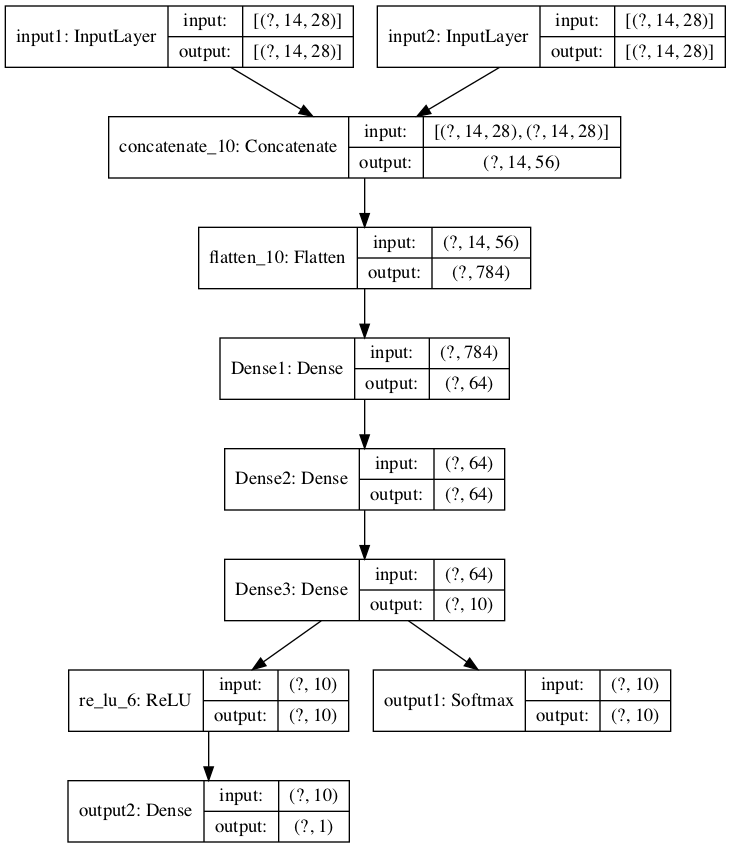

In [76]:
model = Model(inputs=[inputImage1,inputImage2], outputs = [output,output2])
# to build the model (string the layers together), we just specify 
# the input layer and the output layer (they are really a wrapped tensor). 
# The others are not needed because each layer records its connectivity to its parent layer(s).
# All inputs and outputs should be specified so we can specify loss functions/metrics for each output.
# We also need to correspond our input data for each input tensor/layer
model.summary()
utils.plot_model(model,'mymodel.png',show_shapes=True)
# this prints a map of the model; show_shapes indicates whether input/output dimensions are shown.

In [77]:
model.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy','binary_crossentropy'],
    loss_weights=[1.0,0.1],
    metrics=[['sparse_categorical_accuracy'],
    ['binary_accuracy']]
)
# we specify a list of losses, each corresponding to an output layer 
# (in the sequence specified in outputs= when we created the Model)
# loss_weights is in the same sequence. We need it because we need a final loss to do gradient descent on.
# loss_weights determines which linear combination we use for the final weight.
# for metrics, similarly we create two lists of lists of metrics.

In [78]:
model2 = models.clone_model(model)

In [87]:
model2.compile(
    optimizer='adam',
    loss={'output1':'sparse_categorical_crossentropy','output2':'binary_crossentropy'},
    loss_weights={'output1':1.0,'output2':0.1},
    metrics={'output1':['sparse_categorical_accuracy'],'output2':['binary_accuracy']}
)

In [80]:
history = model.fit(
    x=[train_imageSet1,train_imageSet2],
    y=[train_y,np.remainder(train_y,2)],
    batch_size=64,
    epochs=20,
    validation_split=0.15
)

Epoch 1/20
718/718 [==============================] - 1s 2ms/step - loss: 3.4933 - output1_loss: 3.3214 - output2_loss: 1.7195 - output1_sparse_categorical_accuracy: 0.6898 - output2_binary_accuracy: 0.5706 - val_loss: 1.0167 - val_output1_loss: 0.9459 - val_output2_loss: 0.7076 - val_output1_sparse_categorical_accuracy: 0.7214 - val_output2_binary_accuracy: 0.5963
Epoch 2/20
718/718 [==============================] - 1s 1ms/step - loss: 0.8252 - output1_loss: 0.7572 - output2_loss: 0.6802 - output1_sparse_categorical_accuracy: 0.7691 - output2_binary_accuracy: 0.5886 - val_loss: 0.7294 - val_output1_loss: 0.6643 - val_output2_loss: 0.6511 - val_output1_sparse_categorical_accuracy: 0.7974 - val_output2_binary_accuracy: 0.6200
Epoch 3/20
718/718 [==============================] - 1s 1ms/step - loss: 0.6943 - output1_loss: 0.6349 - output2_loss: 0.5942 - output1_sparse_categorical_accuracy: 0.7964 - output2_binary_accuracy: 0.6688 - val_loss: 0.7347 - val_output1_loss: 0.6808 - val_outpu

In [88]:
input_dict = {'input1':train_imageSet1,'input2':train_imageSet2}
label_dict = {'output1':train_y,'output2':np.remainder(train_y,2)}
model2.fit(x=input_dict, y=label_dict, batch_size=64, epochs = 20, validation_split=0.15)

Epoch 1/20
718/718 [==============================] - 1s 2ms/step - loss: 2.3709 - output1_loss: 2.2816 - output2_loss: 0.8935 - output1_sparse_categorical_accuracy: 0.5888 - output2_binary_accuracy: 0.8491 - val_loss: 0.9237 - val_output1_loss: 0.8976 - val_output2_loss: 0.2603 - val_output1_sparse_categorical_accuracy: 0.6707 - val_output2_binary_accuracy: 0.9417
Epoch 2/20
718/718 [==============================] - 1s 1ms/step - loss: 0.8346 - output1_loss: 0.8123 - output2_loss: 0.2235 - output1_sparse_categorical_accuracy: 0.6868 - output2_binary_accuracy: 0.9415 - val_loss: 0.7932 - val_output1_loss: 0.7747 - val_output2_loss: 0.1847 - val_output1_sparse_categorical_accuracy: 0.6989 - val_output2_binary_accuracy: 0.9527
Epoch 3/20
718/718 [==============================] - 1s 2ms/step - loss: 0.7454 - output1_loss: 0.7286 - output2_loss: 0.1679 - output1_sparse_categorical_accuracy: 0.7198 - output2_binary_accuracy: 0.9472 - val_loss: 0.7986 - val_output1_loss: 0.7803 - val_outpu

In [ ]:
print(history.history.keys())

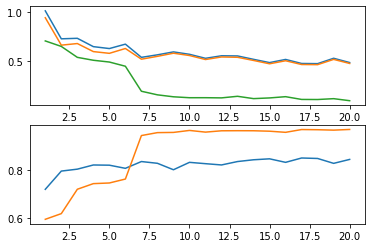

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(range(1,21),history.history['val_loss'])
ax1.plot(range(1,21),history.history['val_output1_loss'])
ax1.plot(range(1,21),history.history['val_output2_loss'])
ax2.plot(range(1,21),history.history['val_output1_sparse_categorical_accuracy'])
ax2.plot(range(1,21),history.history['val_output2_binary_accuracy'])

In [91]:
model.evaluate(x=[test_imageSet1,test_imageSet2],y=[test_y,np.remainder(test_y,2)])
# obviously we could also use the dictionary approach

313/313 [==============================] - 0s 840us/step - loss: 0.5065 - output1_loss: 0.4963 - output2_loss: 0.1016 - output1_sparse_categorical_accuracy: 0.8302 - output2_binary_accuracy: 0.9677


[0.5064949989318848,
 0.4963343143463135,
 0.10160857439041138,
 0.8302000164985657,
 0.9677000045776367]